In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [2]:
df_crop = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df_crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df_crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
label_encode = LabelEncoder()

df_crop['label'] = label_encode.fit_transform(df_crop['label'])
crop_category = {index : label for index, label in enumerate(label_encode.classes_)}
crop_category

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [6]:
df_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [7]:
X = df_crop.drop('label', axis = 1)
y = df_crop['label']

In [8]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [9]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8)

In [11]:
X_train.shape

(1760, 7)

In [12]:
inputs = tf.keras.Input(shape = (7, ))
x = tf.keras.layers.Dense(64, activation = 'relu')(inputs)
# x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(22, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

batch_size = 128
epochs = 89

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs
)

Epoch 1/89
11/11 [==============================] - 1s 59ms/step - loss: 34.9488 - accuracy: 0.0747 - val_loss: 22.7235 - val_accuracy: 0.0824
Epoch 2/89
11/11 [==============================] - 0s 6ms/step - loss: 20.3253 - accuracy: 0.0946 - val_loss: 15.2829 - val_accuracy: 0.1761
Epoch 3/89
11/11 [==============================] - 0s 6ms/step - loss: 13.9738 - accuracy: 0.1989 - val_loss: 10.5857 - val_accuracy: 0.1818
Epoch 4/89
11/11 [==============================] - 0s 6ms/step - loss: 9.0895 - accuracy: 0.2093 - val_loss: 6.6005 - val_accuracy: 0.2188
Epoch 5/89
11/11 [==============================] - 0s 6ms/step - loss: 5.4573 - accuracy: 0.2747 - val_loss: 4.0082 - val_accuracy: 0.2869
Epoch 6/89
11/11 [==============================] - 0s 6ms/step - loss: 3.3414 - accuracy: 0.3556 - val_loss: 2.3601 - val_accuracy: 0.3920
Epoch 7/89
11/11 [==============================] - 0s 6ms/step - loss: 1.8320 - accuracy: 0.5204 - val_loss: 1.5892 - val_accuracy: 0.6080
Epoch 8/89
11

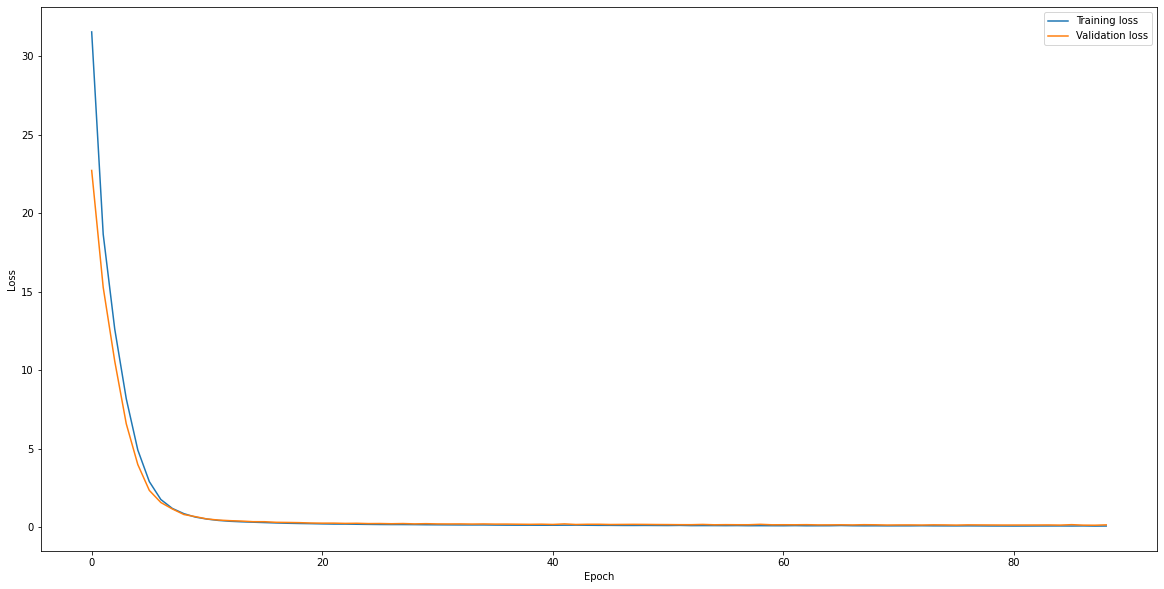

In [13]:
plt.figure(figsize = (20, 10))

plt.plot(range(epochs), history.history['loss'], label = 'Training loss')
plt.plot(range(epochs), history.history['val_loss'], label = 'Validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 975us/step - loss: 0.1519 - accuracy: 0.9432


[0.15191304683685303, 0.9431818127632141]

# Please give feedback and upvote my notebook if you like this